# 人脸识别（腾讯AI开放平台）

使用腾讯AI开放平台接口，提交图片返回人脸信息。

## 1.导入基本库

In [1]:
import hashlib,string,base64
import time,random
import requests,json
from urllib.parse import urlencode
from PIL import Image,ImageDraw

## 2.接口认证信息

下面的信息仅仅用来测试，请使用自己的认证信息。

In [2]:
app_id = '2125029788'
app_key = 'IWuKXY6BIbaBuhHz'

## 3.基本函数

腾讯openai的鉴权一般分为4步：
    - 1.将<key, value>请求参数对按key进行字典升序排序，得到有序的参数对列表N；
    - 2.将列表N中的参数对按URL键值对的格式拼接成字符串，得到字符串T（如：key1=value1&key2=value2），URL键值拼接过程value部分需要URL编码，URL编码算法用大写字母，例如%E8，而不是小写%e8；
    - 3.将应用密钥以app_key为键名，组成URL键值拼接到字符串T末尾，得到字符串S（如：key1=value1&key2=value2&app_key=密钥)；
    - 4.对字符串S进行MD5运算，将得到的MD5值所有字符转换成大写，得到接口请求签名。

In [3]:
def get_params(img):                         #鉴权计算并返回请求参数
    #请求时间戳（秒级），用于防止请求重放（保证签名5分钟有效
    time_stamp=str(int(time.time()))
    #请求随机字符串，用于保证签名不可预测,16代表16位
    nonce_str = ''.join(random.sample(string.ascii_letters + string.digits, 16))
    params = {'app_id':app_id,                #请求包，需要根据不同的任务修改，基本相同
              'image':img,                    #文字类的任务可能是‘text’，由主函数传递进来
              'mode':'0' ,                    #身份证件类可能是'card_type'
              'time_stamp':time_stamp,        #时间戳，都一样
              'nonce_str':nonce_str,          #随机字符串，都一样
              #'sign':''                      #签名不参与鉴权计算，只是列出来示意
             }

    sort_dict= sorted(params.items(), key=lambda item:item[0], reverse = False)  #字典排序
    sort_dict.append(('app_key',app_key))   #尾部添加appkey
    rawtext= urlencode(sort_dict).encode()  #urlencod编码
    sha = hashlib.md5()
    sha.update(rawtext)
    md5text= sha.hexdigest().upper()        #MD5加密计算
    params['sign']=md5text                  #将签名赋值到sign
    return  params                          #返回请求包

## 4.提交图片信息

读取图片（imgpath变量），转化为base64编码，返回的信息为json格式的文本。

In [4]:
imgpath="./test.jpg"    #图片名称
with open(imgpath,'rb') as f:
    ls_f = base64.b64encode(f.read())
    img = ls_f.decode()
params = get_params(img)    #获取鉴权签名并获取请求参数
url = "https://api.ai.qq.com/fcgi-bin/face/face_detectface"
res = requests.post(url,params).json()      #接收从网页传来的结果
print(res)

{'data': {'face_list': [{'roll': 0, 'height': 72, 'yaw': 27, 'y': 82, 'expression': 40, 'glass': 0, 'gender': 0, 'width': 72, 'face_shape': {'left_eye': [{'y': 103, 'x': 97}, {'y': 105, 'x': 100}, {'y': 107, 'x': 103}, {'y': 107, 'x': 107}, {'y': 105, 'x': 110}, {'y': 102, 'x': 108}, {'y': 100, 'x': 104}, {'y': 101, 'x': 100}], 'mouth': [{'y': 136, 'x': 104}, {'y': 139, 'x': 108}, {'y': 141, 'x': 112}, {'y': 141, 'x': 117}, {'y': 140, 'x': 120}, {'y': 138, 'x': 122}, {'y': 136, 'x': 123}, {'y': 135, 'x': 122}, {'y': 134, 'x': 121}, {'y': 135, 'x': 119}, {'y': 134, 'x': 116}, {'y': 135, 'x': 110}, {'y': 136, 'x': 108}, {'y': 137, 'x': 113}, {'y': 137, 'x': 118}, {'y': 137, 'x': 120}, {'y': 136, 'x': 121}, {'y': 136, 'x': 121}, {'y': 136, 'x': 120}, {'y': 137, 'x': 118}, {'y': 136, 'x': 113}, {'y': 136, 'x': 109}], 'right_eyebrow': [{'y': 98, 'x': 135}, {'y': 99, 'x': 133}, {'y': 99, 'x': 130}, {'y': 100, 'x': 127}, {'y': 100, 'x': 125}, {'y': 97, 'x': 127}, {'y': 96, 'x': 130}, {'y': 95

## 5.提交图片信息

74 82 72 72


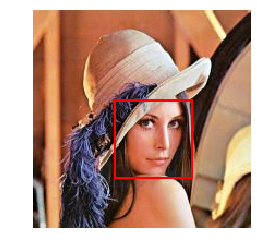

In [5]:
im=Image.open(imgpath)
draw = ImageDraw.Draw(im)
for item in res['data']['face_list']:
    x=item['x']
    y=item['y']
    w=item['width']
    h=item['height']
    print(x,y,w,h)
    draw.rectangle((x, y, x+w, y+h),outline="#FF0000", width=2)
#im.show()
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(im)
plt.axis('off') #不显示坐标
plt.show()